#### Libraries

In [51]:
                                    ####### VISUALIZATION TOOLS #######

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import colormaps as cm
import matplotlib.patches as mpatches 
from matplotlib.patches import Patch

import seaborn as sns
import warnings #ignore the errors for newer version of distplot
warnings.filterwarnings("ignore", category=UserWarning) 

import plotly.express as px
import plotly.graph_objects as go

import folium
from folium import plugins
from folium import Choropleth


                                    ####### VECTORS AND MATRICES #######

import numpy as np
import pandas as pd

                                    ####### SCIPY #######

from scipy import stats

                                    ####### SCIKIT-LEARN #######

from sklearn.preprocessing import StandardScaler #for Z-score normalization
from sklearn.preprocessing import normalize  #normalization along rows
from sklearn.preprocessing import PolynomialFeatures #to do a polynomial regression
from sklearn.preprocessing import OneHotEncoder #one-hot encoding adding columns
from sklearn.preprocessing import LabelEncoder #from strings to label
from sklearn.preprocessing import label_binarize #one-hot encoding of vectors

from sklearn.linear_model import LinearRegression #for linear (parameter) regression
from sklearn.linear_model import Ridge #for Ridge regression
from sklearn.linear_model import Lasso #for Lasso regression
from sklearn.linear_model import LogisticRegression #logistic regression 


from sklearn.tree import DecisionTreeClassifier #for tree classifier (not regression)
from sklearn.tree import DecisionTreeRegressor #for regression tree
from sklearn.tree import plot_tree #to plot the tree

from sklearn.svm import LinearSVC #supported vector machine
from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.cluster import KMeans #Kmeans

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error #for MSE error
from sklearn.metrics import r2_score #for the R^2 score on muliple variable regression
from sklearn.metrics import log_loss # for the cross-correlation entropy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score # k-means accuracies
from sklearn.metrics import explained_variance_score #for explained variance

from sklearn.pipeline import Pipeline #to use pipelines

from sklearn.model_selection import train_test_split #train-test splitting
from sklearn.model_selection import cross_val_score #K-fold validation
from sklearn.model_selection import cross_val_predict #K-fold validation
from sklearn.model_selection import StratifiedKFold #K-fold validation
from sklearn.model_selection import GridSearchCV #for GridSearchCV


from sklearn.multiclass import OneVsOneClassifier #multiclass classification using binary classification instead

from sklearn.utils.class_weight import compute_sample_weight

from sklearn.decomposition import PCA

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

import umap.umap_ as UMAP 
from sklearn.manifold import TSNE


from sklearn.datasets import make_blobs 
from sklearn.datasets import make_classification

from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
from sklearn.datasets import load_breast_cancer
cancers = load_breast_cancer()
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn.datasets import fetch_california_housing
cal_housing = fetch_california_housing


                                    ####### ENSAMBLE METHODS #######

from xgboost import XGBRegressor

                                    ####### PYTORCH #######
import torch
from torch import nn #train neural networks
from torch import optim #optimizer
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset
import torchvision.models as models

                                   ####### IMAGES #######
                                   
import os
from PIL import Image # converting images into arrays
from PIL import ImageFile

from copy import copy
import operator
import sys

                                   ####### SCRAPING #######
import urllib
import requests
import io
from io import StringIO
from bs4 import BeautifulSoup #text/HTML
from PIL import Image
from IPython.display import display, IFrame #APPLICATION/PDF
import json #JSON
import xml.etree.ElementTree as ET #XML



import gymnasium
from gymnasium.wrappers import RecordVideo
import glob, io, base64
from IPython.display import HTML
from IPython import display as ipythondisplay
import random
import wordcloud
from wordcloud import WordCloud, STOPWORDS

from collections import namedtuple, deque

import time #time of running
import datetime 

import re
import unicodedata



In [5]:
# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

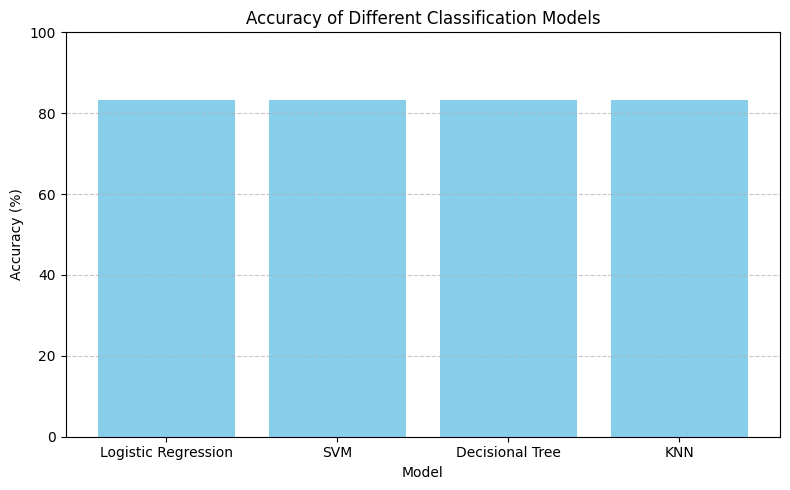

In [104]:
import matplotlib.pyplot as plt

# Dati
models = ['Logistic Regression', 'SVM', 'Decisional Tree', 'KNN']
accuracy = [83.33, 83.33, 83.33, 83.33]

# Plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy, color='skyblue')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.title('Accuracy of Different Classification Models')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Collecting the data

## API

In [26]:
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [88]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)
response.status_code

200

In [89]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response=requests.get(static_json_url)
response.status_code

200

In [91]:
data = pd.json_normalize(response.json())
data['static_fire_date_utc']

0      2006-03-17T00:00:00.000Z
1                          None
2                          None
3      2008-09-20T00:00:00.000Z
4                          None
                 ...           
102                        None
103    2020-10-17T05:23:00.000Z
104    2020-10-21T12:55:00.000Z
105    2020-09-25T05:42:00.000Z
106    2020-11-11T16:17:00.000Z
Name: static_fire_date_utc, Length: 107, dtype: object

In [92]:
data = pd.json_normalize(response.json())

# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [93]:
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [94]:
getBoosterVersion(data)
getLaunchSite(data)
getPayloadData(data)
getCoreData(data)

In [95]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

In [96]:
df = pd.DataFrame(launch_dict)
data_falcon9=df[df['BoosterVersion']!='Falcon 1']

data_falcon9.shape

(90, 17)

In [97]:
df = pd.DataFrame(launch_dict)
data_falcon9=df[df['BoosterVersion']!='Falcon 1']
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [98]:
PMmean=data_falcon9['PayloadMass'].mean()

data_falcon9['PayloadMass']=data_falcon9['PayloadMass'].replace(np.nan,PMmean)

/var/folders/35/gw8dmgsd6m11bg8nhrgpd3vr0000gn/T/ipykernel_61753/2678131386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass']=data_falcon9['PayloadMass'].replace(np.nan,PMmean)


In [50]:
data_falcon9.count()

FlightNumber      90
Date              90
BoosterVersion    90
PayloadMass       90
Orbit             90
LaunchSite        90
Outcome           90
Flights           90
GridFins          90
Reused            90
Legs              90
LandingPad        64
Block             90
ReusedCount       90
Serial            90
Longitude         90
Latitude          90
dtype: int64

## Web scraping (Wikipedia)

In [99]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    
    
def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the element of a table data cell extracts extra row
    """
    if row.br:
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = row.get_text(separator=' ', strip=True)
    
    if not colunm_name.strip().isdigit():
        return colunm_name   


In [100]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"
r=requests.get(static_url)
soup = BeautifulSoup(r.text,'html.parser')
print(soup.title)

html_tables=[]
for table in soup.find_all('table'):
   html_tables.append(table)

first_launch_table = html_tables[2]
#print(first_launch_table)

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>


In [83]:
column_names = []

for column in soup.find_all('th'):
   name=extract_column_from_header(column)
   if name is not None and len(name) > 0:
      column_names.append(name)

In [85]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [86]:
extracted_row = 0
#Extract each table 
for table_number, table in enumerate(soup.find_all('table', "wikitable plainrowheaders collapsible")):
    for rows in table.find_all("tr"):
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False

        row = rows.find_all('td')

        if flag:
            extracted_row += 1

            # Estraggo i dati
            datatimelist = date_time(row[0])
            date = datatimelist[0].strip(',')
            time = datatimelist[1]

            bv = booster_version(row[1])
            if not bv:
                bv = row[1].a.string

            launch_site = row[2].a.string
            payload = row[3].a.string
            payload_mass = get_mass(row[4])
            orbit = row[5].a.string
            customer = row[6].a.string if row[6].a else row[6].get_text(strip=True)
            launch_outcome = list(row[7].strings)[0]
            booster_landing = landing_status(row[8])

            # Add to dict
            launch_dict['Flight No.'].append(flight_number)
            launch_dict['Date'].append(date)
            launch_dict['Time'].append(time)
            launch_dict['Version Booster'].append(bv)
            launch_dict['Launch site'].append(launch_site)
            launch_dict['Payload'].append(payload)
            launch_dict['Payload mass'].append(payload_mass)
            launch_dict['Orbit'].append(orbit)
            launch_dict['Customer'].append(customer)
            launch_dict['Launch outcome'].append(launch_outcome)
            launch_dict['Booster landing'].append(booster_landing)

In [87]:
df= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

# Data wrangling

In [101]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857


In [103]:
df['LaunchSite'].value_counts()

LaunchSite
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64

In [ ]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px

# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='id',
                                        options=[
                                            {'label': 'All Sites', 'value': 'ALL'},
                                            {'label': 'site1', 'value': 'site1'},
                                        ],
                                        value='ALL',
                                        placeholder="place holder here",
                                        searchable=True
                                        ),
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                #dcc.RangeSlider(id='payload-slider',...)

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(dcc.Graph(id='success-payload-scatter-chart')),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output


# Run the app
if __name__ == '__main__':
    app.run()

In [10]:
import pandas as pd
from openpyxl import Workbook
from openpyxl.styles import Font
from openpyxl.utils import get_column_letter

# Dati tabellari
data = [
    [1, "Detecting COVID‑19 with Chest X‑Ray", "Amit Yadav", "https://www.coursera.org/projects/covid-19-detection-x-ray", "✔️", "❌", 2],
    [2, "Aerial Image Segmentation", "Parth Dhameliya", "https://www.coursera.org/projects/aerial-image-segmentation-with-pytorch", "✔️", "❌", 2],
    [3, "Siamese Network", "Parth Dhameliya", "https://www.coursera.org/projects/deep-learning-with-pytorch-siamese-network", "✔️", "❌", 2],
    [4, "Image Segmentation", "Parth Dhameliya", "https://www.coursera.org/projects/deep-learning-with-pytorch-image-segmentation", "✔️", "❌", 2],
    [5, "GAN", "Parth Dhameliya", "https://www.coursera.org/projects/deep-learning-with-pytorch-generative-adversarial-network", "✔️", "❌", 2],
    [6, "Object Localization (PyTorch)", "Project Network", "https://www.coursera.org/projects/deep-learning-with-pytorch--object-localization", "✔️", "❌", 2],
    [7, "Radio Signal Classification", "Project Network", "https://www.coursera.org/projects/classify-radio-signals-with-pytorch", "✔️", "❌", 2],
    [8, "CNN Basics", "Project Network", "https://www.coursera.org/projects/cnns-with-tensorflow-basics-of-machine-learning", "❌", "✔️", 1.5],
    [9, "Basic Image Classification", "Project Network", "https://www.coursera.org/projects/tensorflow-beginner-basic-image-classification", "❌", "✔️", 2],
    [10, "Visualizing CNN Filters", "Amit Yadav", "https://www.coursera.org/projects/visualizing-filters-cnn-tensorflow", "❌", "✔️", 1],
    [11, "Activation Functions Deep‑Dive", "Project Network", "https://www.coursera.org/projects/deep-dive-tensorflow-activation-functions", "❌", "✔️", 2],
    [12, "Object Localization (TensorFlow)", "Project Network", "https://www.coursera.org/projects/object-localization-tensorflow", "❌", "✔️", 2],
    [13, "BERT Fine‑Tuning", "Snehan Kekre", "https://www.coursera.org/projects/fine-tune-bert-tensorflow", "❌", "✔️", 3],
    [14, "Transfer Learning NLP", "Snehan Kekre", "https://www.coursera.org/projects/transfer-learning-nlp-tensorflow-hub", "❌", "✔️", 2],
    [15, "Machine Learning", "Andrew Ng", "https://www.coursera.org/learn/machine-learning", "❌", "✔️", 5],
    [16, "Neural Networks and Deep Learning", "Andrew Ng", "https://www.coursera.org/learn/neural-networks-deep-learning", "❌", "✔️", 24],
    [17, "Improving Deep Neural Networks", "Andrew Ng", "https://www.coursera.org/learn/deep-neural-network", "❌", "✔️", 9],
    [18, "Convolutional Neural Networks", "Andrew Ng", "https://www.coursera.org/learn/convolutional-neural-networks", "❌", "✔️", 20],
    [19, "Deep Learning with PyTorch", "Joseph Santarcangelo", "https://www.coursera.org/learn/deep-neural-networks-with-pytorch", "✔️", "❌", 31],
    [20, "Advanced Deep Learning with PyTorch", "IBM", "https://www.coursera.org/learn/advanced-deep-learning-with-pytorch", "✔️", "❌", 40],
    [21, "Optimize TF Models with TensorRT", "Project Network", "https://www.coursera.org/projects/tensorflow-tensorrt", "❌", "✔️", 2],
    [22, "Visualize Filters (PyTorch)", "Parth Dhameliya", "https://www.coursera.org/projects/facial-expression-recognition-with-pytorch", "✔️", "❌", 2],
    [23, "COVID-19 X-Ray PyTorch (variant)", "Amit Yadav", "https://www.coursera.org/projects/covid-19-detection-x-ray", "✔️", "❌", 2],
    [24, "Learning TF \"Hello World\"", "Google Cloud", "https://www.coursera.org/projects/googlecloud-learning-tensorflow-the-hello-world-of-machine-learning-063j7", "❌", "✔️", 2],
    [25, "Pneumonia Detection (EfficientNet)", "Parth Dhameliya", "https://www.coursera.org/projects/pneumonia-classification-using-pytorch", "✔️", "❌", 2],
    [26, "Radio Signals Classification (duplicate?)","Project Network", "https://www.coursera.org/projects/classify-radio-signals-with-pytorch", "✔️", "❌", 2],
    [27, "Object Localization (duplicate?)", "Project Network", "https://www.coursera.org/projects/deep-learning-with-pytorch--object-localization", "✔️", "❌", 2],
    [28, "CNN Basics (duplicate?)", "Project Network", "https://www.coursera.org/projects/cnns-with-tensorflow-basics-of-machine-learning", "❌", "✔️", 1.5],
    [29, "Basic Image Classification (duplicate?)", "Project Network", "https://www.coursera.org/projects/tensorflow-beginner-basic-image-classification", "❌", "✔️", 2],
    [30, "Visualizing CNN Filters (duplicate TF)", "Amit Yadav", "https://www.coursera.org/projects/visualizing-filters-cnn-tensorflow", "❌", "✔️", 1]
]

# DataFrame
columns = ["#", "Corso", "Istruttore", "Link Coursera", "PyTorch", "TensorFlow", "Durata (h)"]
df = pd.DataFrame(data, columns=columns)

# Ordina per durata
df_sorted = df.sort_values(by="Durata (h)")

# Aggiungi collegamenti cliccabili
df_sorted["Link Coursera"] = df_sorted.apply(lambda x: f'=HYPERLINK("{x["Link Coursera"]}", "Link")', axis=1)

# Esporta in Excel
excel_path = "/Users/alex/Desktop/programmazione/Coursera_Corsi_Ordinati_Per_Durata.xlsx"
df_sorted.to_excel(excel_path, index=False)

excel_path


'/Users/alex/Desktop/programmazione/Coursera_Corsi_Ordinati_Per_Durata.xlsx'

In [8]:
import sys
import subprocess

subprocess.check_call([sys.executable, "-m", "pip", "install", "openpyxl"])


  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [openpyxl]1/2 [openpyxl]


0